In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import *

## Wide and Deep Model Architechture

In [3]:
input_w = layers.Input(shape=(1, 1), name='wide_input')
input_d = layers.Input(shape=(1, 1), name='deep_input')

In [ ]:
hidden1 = layers.Dense(10, activation='relu', name='dense_1')(input_d)
hidden2 = layers.Dense(10, activation='relu', name='dense_2')(hidden1)
concat = layers.concatenate([input_w, hidden2], name="concatenate")

aux_out = layers.Dense(10, name='aux_output')(hidden2)
main_out = layers.Dense(1, activation='sigmoid', name='main_output')(concat)

In [ ]:
model = models.Model(inputs=[input_w, input_d], outputs=[main_out, aux_out])

In [ ]:
utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

## Implement Model as Class

This can be done by subclassing ```tf.keras.models.Model``` class. At least two methods ```__init__()``` and ```call()```  must be defined. Optionally, ```build()``` can also be defined.

In [27]:
class WideDeepModel(models.Model):
    def __init__(self, units=10, **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = layers.Dense(units, activation='relu', name='dense_1')
        self.hidden2 = layers.Dense(units, activation='relu', name='dense_2')
        self.main_out = layers.Dense(1, activation='sigmoid', name='main_output')
        self.aux_out = layers.Dense(units, name='aux_output')

    def call(self, inputs):
        input_w, input_d = inputs
        hidden1 = self.hidden1(input_d)
        hidden2 = self.hidden2(hidden1)
        aux_out = self.aux_out(hidden2)
        concat = layers.concatenate([input_w, hidden2])
        main_out = self.main_out(concat)
        return main_out, aux_out

In [28]:
model = WideDeepModel()

In [29]:
input_w = layers.Input(shape=(1,), name='wide_input')
input_d = layers.Input(shape=(1,), name='deep_input')

In [30]:
model.build()

TypeError: build() missing 1 required positional argument: 'input_shape'

In [24]:
wide_deep_model = models.Model(inputs=[input_w, input_d], outputs=model.call([input_w, input_d]))

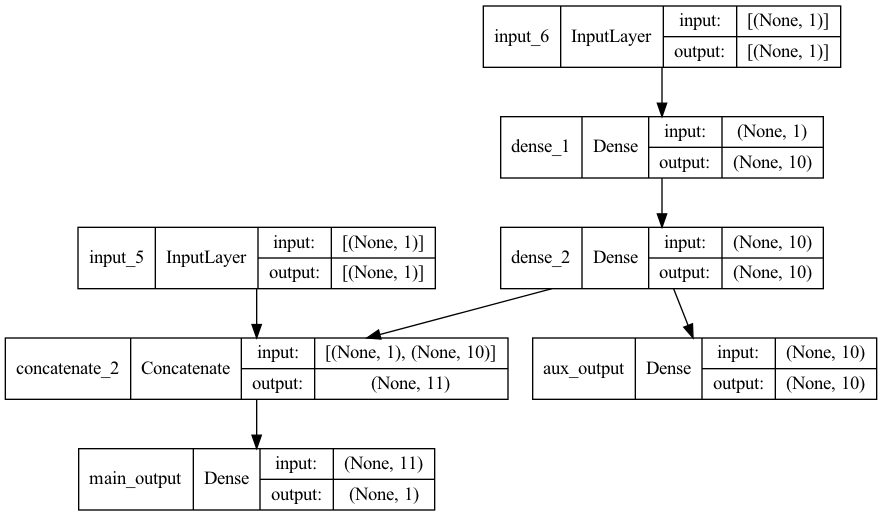

In [25]:
utils.plot_model(wide_deep_model, show_shapes=True)

In [10]:
model.build()summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.